In [25]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing import image

In [26]:
# Deep Learning CNN model to recognize face
'''This script uses a database of images and creates CNN model on top of it to test
   if the given image is recognized correctly or not'''

'''####### IMAGE PRE-PROCESSING for TRAINING and TESTING data #######'''

# Specifying the folder where images are present
TrainingImagePath=r'datasets\Final Training Images'

from keras.preprocessing.image import ImageDataGenerator
# Understand more about ImageDataGenerator at below link
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

# Defining pre-processing transformations on raw images of training data
# These hyper parameters helps to generate slightly twisted versions
# of the original image, which leads to a better model, since it learns
# on the good and bad mix of images
train_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)

# Defining pre-processing transformations on raw images of testing data
# No transformations are done on the testing images
test_datagen = ImageDataGenerator()

# Generating the Training Data
training_set = train_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')


# Generating the Testing Data
test_set = test_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

# Printing class labels for each face
test_set.class_indices

Found 344 images belonging to 17 classes.
Found 344 images belonging to 17 classes.


{'face1': 0,
 'face10': 1,
 'face11': 2,
 'face12': 3,
 'face13': 4,
 'face14': 5,
 'face15': 6,
 'face16': 7,
 'face2': 8,
 'face3': 9,
 'face4': 10,
 'face5': 11,
 'face6': 12,
 'face7': 13,
 'face8': 14,
 'face9': 15,
 'faryal': 16}

In [27]:
# class_indices have the numeric tag for each face
TrainClasses=training_set.class_indices
 
# Storing the face and the numeric tag for future reference
ResultMap={}
for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[faceValue]=faceName
 
# Saving the face map for future reference
import pickle
with open("ResultsMap.pkl", 'wb') as fileWriteStream:
    pickle.dump(ResultMap, fileWriteStream)
 
# The model will give answer as a numeric tag
# This mapping will help to get the corresponding face name for it
print("Mapping of Face and its ID",ResultMap)
 
# The number of neurons for the output layer is equal to the number of faces
OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)

Mapping of Face and its ID {0: 'face1', 1: 'face10', 2: 'face11', 3: 'face12', 4: 'face13', 5: 'face14', 6: 'face15', 7: 'face16', 8: 'face2', 9: 'face3', 10: 'face4', 11: 'face5', 12: 'face6', 13: 'face7', 14: 'face8', 15: 'face9', 16: 'faryal'}

 The Number of output neurons:  17


In [28]:
'''######################## Create CNN deep learning model ########################'''
'''Initializing the Convolutional Neural Network'''
classifier= Sequential()

''' STEP--1 Convolution
# Adding the first layer of CNN
# we are using the format (64,64,3) because we are using TensorFlow backend
# It means 3 matrix of size (64X64) pixels representing Red, Green and Blue components of pixels
'''
classifier.add(Convolution2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=(64,64,3), activation='relu'))

'''# STEP--2 MAX Pooling'''
classifier.add(MaxPool2D(pool_size=(2,2)))

'''############## ADDITIONAL LAYER of CONVOLUTION for better accuracy #################'''
classifier.add(Convolution2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2)))

'''# STEP--3 FLattening'''
classifier.add(Flatten())

'''# STEP--4 Fully Connected Neural Network'''
classifier.add(Dense(64, activation='relu'))

classifier.add(Dense(OutputNeurons, activation='softmax'))

'''# Compiling the CNN'''
#classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])

###########################################################
import time
# Measuring the time taken by the model to train
StartTime=time.time()

# Starting the model training
r = classifier.fit_generator(
                  training_set,
                  validation_data=test_set,
                  epochs=30,
                  steps_per_epoch=len(training_set),
                  validation_steps=len(test_set)
            )

EndTime=time.time()
print("###### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes ######')

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
11/11 [==============================] - 10s 763ms/step - loss: 106.5990 - accuracy: 0.1275 - val_loss: 2.9565 - val_accuracy: 0.3285
Epoch 2/30
11/11 [==============================] - 5s 501ms/step - loss: 2.6669 - accuracy: 0.2952 - val_loss: 2.1730 - val_accuracy: 0.3663
Epoch 3/30
11/11 [==============================] - 5s 485ms/step - loss: 2.0968 - accuracy: 0.3456 - val_loss: 1.9390 - val_accuracy: 0.3663
Epoch 4/30
11/11 [==============================] - 5s 495ms/step - loss: 1.8806 - accuracy: 0.3803 - val_loss: 1.9770 - val_accuracy: 0.4012
Epoch 5/30
11/11 [==============================] - 6s 508ms/step - loss: 1.9280 - accuracy: 0.3929 - val_loss: 1.7480 - val_accuracy: 0.4622
Epoch 6/30
11/11 [==============================] - 5s 485ms/step - loss: 1.7133 - accuracy: 0.4827 - val_loss: 1.6114 - val_accuracy: 0.5262
Epoch 7/30
11/11 [==============================] - 5s 463ms/step - loss: 1.6223 - accuracy: 0.5142 - val_loss: 1.3497 - val_accuracy: 0.5610
Epo

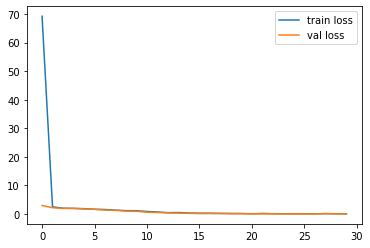

<Figure size 432x288 with 0 Axes>

In [29]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

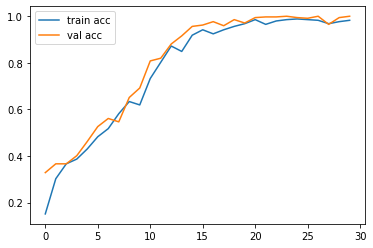

<Figure size 432x288 with 0 Axes>

In [30]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [31]:
classifier.save('model.h5')

In [32]:
#Confution Matrix and Classification Report
Y_pred = classifier.predict_generator(test_set,len(test_set))
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[ 0  0  2  0  0  0  1  1  1  1  1  2  1  1  0  0  4]
 [ 2  0  1  1  2  1  0  0  1  2  2  1  1  1  1  0  4]
 [ 1  0  0  1  0  2  0  0  0  1  0  2  1  0  0  1  7]
 [ 1  1  1  0  1  1  1  0  0  2  0  0  0  0  1  0  5]
 [ 1  1  0  2  0  0  0  2  2  0  0  0  1  0  2  0  2]
 [ 0  2  0  0  0  1  2  0  1  0  0  0  0  0  1  0  5]
 [ 0  0  0  1  1  2  2  1  2  0  2  0  1  0  0  0  3]
 [ 0  1  2  0  0  1  3  0  1  1  0  1  0  3  0  0  4]
 [ 0  0  1  1  1  0  0  1  0  1  0  0  0  1  2  1  6]
 [ 0  0  0  0  2  0  1  2  0  1  1  2  2  0  0  1  2]
 [ 3  1  1  1  0  0  1  0  1  1  2  2  1  0  0  0  3]
 [ 1  1  0  0  1  2  0  1  0  0  0  1  2  0  1  0  6]
 [ 0  0  1  0  0  0  0  0  1  0  2  0  1  1  0  2  8]
 [ 1  2  2  0  1  1  1  0  0  1  0  1  1  1  0  1  1]
 [ 0  3  0  1  0  0  0  1  1  0  1  0  0  3  0  1  3]
 [ 0  4  3  0  1  0  0  0  0  0  1  0  0  0  1  1  5]
 [ 5  4  2  6  3  1  3  8  4  3  5  4  4  3  5  8 32]]


In [33]:
print(training_set.class_indices)

{'face1': 0, 'face10': 1, 'face11': 2, 'face12': 3, 'face13': 4, 'face14': 5, 'face15': 6, 'face16': 7, 'face2': 8, 'face3': 9, 'face4': 10, 'face5': 11, 'face6': 12, 'face7': 13, 'face8': 14, 'face9': 15, 'faryal': 16}


Prediction is:  face15


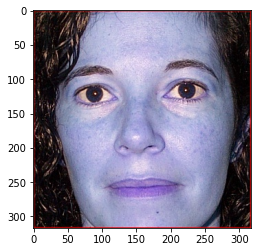

In [12]:
'''########### Making single predictions ###########'''
face_pic = cv2.imread(r"datasets\Final Testing Images\face15\3face15.jpg")
plt.imshow(face_pic)
ImagePath=r"datasets\Final Testing Images\face15\3face15.jpg"
test_image=image.load_img(ImagePath,target_size=(64,64))
test_image=image.img_to_array(test_image)

test_image=np.expand_dims(test_image,axis=0)

result=classifier.predict(test_image,verbose=0)
print('Prediction is: ',ResultMap[np.argmax(result)])

Prediction is:  face10


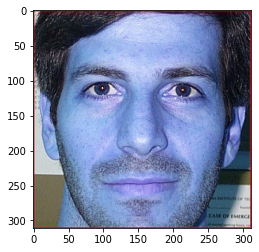

In [13]:
'''########### Making single predictions ###########'''
face_pic = cv2.imread(r"datasets\Final Testing Images\face10\2face10.jpg")
plt.imshow(face_pic)
ImagePath=r"datasets\Final Testing Images\face10\2face10.jpg"
test_image=image.load_img(ImagePath,target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image,verbose=0)
print('Prediction is: ',ResultMap[np.argmax(result)])

Prediction is:  face12


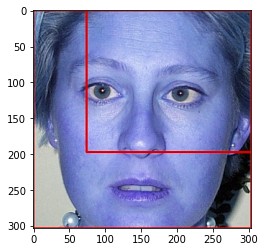

In [15]:
'''########### Making single predictions ###########'''
face_pic = cv2.imread(r"datasets\Final Testing Images\face12\4face12.jpg")
plt.imshow(face_pic)
ImagePath=r"datasets\Final Testing Images\face12\4face12.jpg"
test_image=image.load_img(ImagePath,target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image,verbose=0)
print('Prediction is: ',ResultMap[np.argmax(result)])

Prediction is:  face3


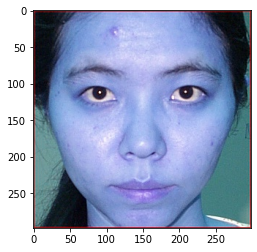

In [16]:
'''########### Making single predictions ###########'''
import numpy as np
from keras.preprocessing import image
import cv2
face_pic = cv2.imread(r"datasets\Final Testing Images\face3\3face3.jpg")
plt.imshow(face_pic)
ImagePath=r"datasets\Final Testing Images\face3\3face3.jpg"
test_image=image.load_img(ImagePath,target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image,verbose=0)
print('Prediction is: ',ResultMap[np.argmax(result)])

Prediction is:  face13


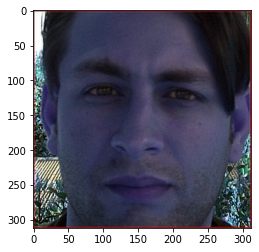

In [17]:
'''########### Making single predictions ###########'''
import numpy as np
from keras.preprocessing import image
import cv2
face_pic = cv2.imread(r"datasets\Final Testing Images\face13\4face13.jpg")
plt.imshow(face_pic)
ImagePath=r"datasets\Final Testing Images\face13\4face13.jpg"
test_image=image.load_img(ImagePath,target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image,verbose=0)
print('Prediction is: ',ResultMap[np.argmax(result)])

Prediction is:  face8


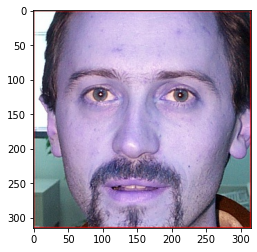

In [18]:
'''########### Making single predictions ###########'''
import numpy as np
from keras.preprocessing import image
import cv2
face_pic = cv2.imread(r"datasets\Final Testing Images\face8\3face8.jpg")
plt.imshow(face_pic)
ImagePath=r"datasets\Final Testing Images\face8\3face8.jpg"
test_image=image.load_img(ImagePath,target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image,verbose=0)
print('Prediction is: ',ResultMap[np.argmax(result)])


Prediction is:  face9


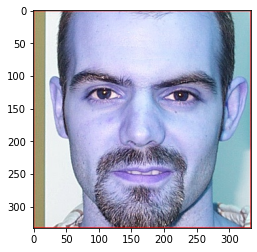

In [19]:
'''########### Making single predictions ###########'''
import numpy as np
from keras.preprocessing import image
import cv2
face_pic = cv2.imread(r"datasets\Final Testing Images\face9\1face9.jpg")
plt.imshow(face_pic)
ImagePath=r"datasets\Final Testing Images\face9\1face9.jpg"
test_image=image.load_img(ImagePath,target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image,verbose=0)
print('Prediction is: ',ResultMap[np.argmax(result)])

Prediction is:  face16


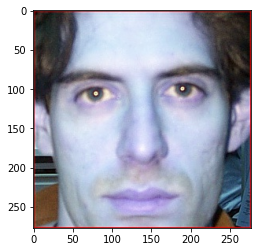

In [20]:
'''########### Making single predictions ###########'''
import numpy as np
from keras.preprocessing import image
import cv2
face_pic = cv2.imread(r"datasets\Final Testing Images\face16\2face16.jpg")
plt.imshow(face_pic)
ImagePath=r"datasets\Final Testing Images\face16\2face16.jpg"
test_image=image.load_img(ImagePath,target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image,verbose=0)
print('Prediction is: ',ResultMap[np.argmax(result)])

Prediction is:  face4


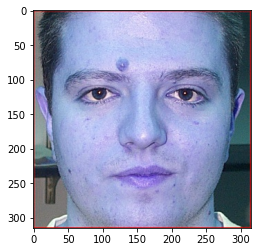

In [21]:
'''########### Making single predictions ###########'''
face_pic = cv2.imread(r"datasets\Final Testing Images\face4\1face4.jpg")
plt.imshow(face_pic)
ImagePath=r"datasets\Final Testing Images\face4\1face4.jpg"
test_image=image.load_img(ImagePath,target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image,verbose=0)
print('Prediction is: ',ResultMap[np.argmax(result)])

In [34]:
'''########### Making single predictions ###########'''
#face_pic = cv2.imread(r"datasets\Final Testing Images\faryal\99.jpg")
#plt.imshow(face_pic)
ImagePath=r"datasets\Final Testing Images\faryal\99.jpg"
test_image=image.load_img(ImagePath,target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image,verbose=0)
print('Prediction is: ',ResultMap[np.argmax(result)])

Prediction is:  faryal
